In [490]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [495]:
lab=pd.read_csv('ML/train_labels.csv')
sub=pd.read_csv('ML/submission_format6c29943.csv')

In [492]:
rd=[]
for j in lab.columns:
    if j.startswith('RD'):
        rd.append(j)

In [493]:
rd_df=lab[rd]
rd_df.head()

,RD_method_party_A,RD_party_A_short_term_debt_classification,RD_party_A_moody_short_term_trigger_method,RD_party_A_moody_short_term_threshold,RD_party_A_SnP_short_term_trigger_method,RD_party_A_SnP_short_term_threshold,RD_party_A_Fitch_short_term_trigger_method,RD_party_A_Fitch_short_term_threshold,RD_party_A_long_term_debt_classification,RD_party_A_moody_long_term_trigger_method,RD_party_A_moody_long_term_threshold,RD_party_A_SnP_long_term_trigger_method,RD_party_A_SnP_long_term_threshold,RD_party_A_Fitch_long_term_trigger_method,RD_party_A_Fitch_long_term_threshold
0,1,NotFound,NotFound,NotFound,NotFound,NotFound,NotFound,NotFound,Senior Unsecured;Unsubordinated,below,Baa3,below,BBB-,NotFound,NotFound
1,1,unsecured,below,P-2,below,A1,NotFound,NotFound,unsecured,below,A1,below,AA-,NotFound,NotFound
2,1,senior unsecured;unsubordinated,below,P-1,below,A1+,below,F1,unsecured;Unsubordinated,below,Baa3,below,BBB,below,BBB-
3,1,Unsecured,below,P-1,below,A1,NotFound,NotFound,Unsecured,below,A2,below,AA-,NotFound,NotFound
4,1,NotFound,NotFound,NotFound,NotFound,NotFound,NotFound,NotFound,senior unsecured;Unsubordinated,below,Ba1,below,BB+,NotFound,NotFound


# Train Data

In [494]:
from bs4 import BeautifulSoup

addev=[]
i=0

for k in lab['File_Name'].values:
    infile = open("ML/training_data/data/"+k+".xml","r",encoding="utf8")
    contents = infile.read()
    f=True
    soup = BeautifulSoup(contents,'xml')
    titles = soup.find_all('text')
    print('---------------',k,'------------')
    st=""
    for title in titles:
        if title.get_text().lower().find('rating')!=-1:
            print('>>',title.get_text())
            st=st+title.get_text()
            
            
    if st!="":
        addev.append(st)
    else:
        addev.append('NotFound')
        
        


--------------- 1_bk ------------
>> 

(a) The rating issued by Standard & Poor’s Rating Service, or its successor or
assign (“S&P”) or Moody’s Investors Service, Inc., or its successor or assign
(“Moody’s”) with respect to the long-term, senior unsecured, unsubordinated
debt securities (“Debt Securities”) of Party A’s Credit Support Provider is rated
below BBB- in the case of S&P or Baa3 in the case of Moody’s or (b) S&P or
Moody’s ceases to issue a rating with respect to the Debt Securities of Party A’s
Credit Support Provider (provided that such rating agency continues to be in the
business of rating Debt Securities).

>> 

(a) The rating issued by S&P or Moody’s with respect to the Debt Securities of
Party B is rated below BBB- in the case of S&P or Baa3 in the case of Moody’s
or (b) S&P or Moody’s ceases to issue a rating with respect to the Debt Securities
of Party B (provided that such rating agency continues to be in the business of
rating Debt Securities).

>> 

If either S&P 

--------------- 53_bk ------------
>> 

With respect to Party A, if Party A’s long-term unsecured, unenhanced,
unsubordinated debt rating is withdrawn, suspended or reduced below “BBB-” in die
case of S&P or below “Baa3” in the case of Moody’s; or

>> 

With respect to Party B, if the State of Michigan’s long-term unsecured, unenhanced,
unsubordinated debt rating is withdrawn, suspended or reduced below “BBB-” in the
case of S&P or below “Baa3” in the case of Moody’s.

--------------- 57_bk ------------
>> 

(ii) Downgrade of Party A.

Either (x) Moody's Investors Service, Inc. ("Moody's") or Standard & Poor's Ratings
Group, a division of The McGraw-Hill Companies, Inc. ("SnP") reduces Party A's (1)
short-term unsecured debt rating below P-1 by Moody's or Al by S&P or (2) long-term
unsecured debt rating below A2 by Moody's or AA- by S&P, or any such rating is
suspended or withdrawn by either S&P or Moody's, or (y) (i) the short-term unsecured
debt rating by Moody's is P-1 and Moody's



--------------- 70_bk ------------
>> 

Tax Event Upon Merger. The party (the “Burdened Party”) on the next succeeding Scheduled
Settlement Date will either (1) be required to pay an additional amount in respect of an Indemnifiable Tax
under Section 2(d)(i)(4) (except in respect of interest under Section 9(h)) or (2) receive a payment from
which an amount has been deducted or withheld for or on account of any Tax in respect of which the other
party is not required to pay an additional amount (other than by reason of Section 2(d)(i)(4)(A) or (B)), in
either case as a result of a party consolidating or amalgamating with, or merging with or into, or transferring
all or substantially all its assets (or any substantial part of the assets comprising the business conducted by it
as of the date of this Master Agreement) to, or reorganising, reincorporating or reconstituting into or as,
another entity (which will be the Affected Party) where such action does not constitute a Merger Without
Assu

--------------- 81_bk ------------
>> 

(A) any Rating in respect of Party A is issued below or falls below the Rating T rigger;

>> 

(B) all Ratings in respect of Party A which did not have any outstanding Rated Obligations
prior to the removal or withdrawal of those Ratings, are withdrawn or
removed by each Rating Agency and not replaced; or

>> 

(C) all Ratings in respect of Party A are withdrawn by each Rating Agency and not
replaced, where Previously Rated Obligations of such Party remain outstanding.

For these purposes, "Previously Rated Obligation" means in respect of a Party, any
obligation or debt issuance program of such entity which was previously ascribed a Rating
which is removed or withdrawn by the relevant Rating Agency and not replaced;

"Rating" means a long term senior unsecured credit rating ascribed by a Rating Agency in
respect of a Party, or any of its Rated Obligations;

"Rating Agency" means Standard & Poor's Ratings Group ("S&P") and Moody's Investors
Servic

--------------- 91_bk ------------
>> 

(ii) Downgrade of Party A.

Either (x) Moody's Investors Service, Inc. ("Moody's") or Standard & Poor's Ratings
Group, a division of The McGraw-Hill Companies, Inc. ("SnP") reduces Party A's (1)
short-term unsecured debt rating below P-1 by Moody's or Al by S&P or (2) long-term
unsecured debt rating below A2 by Moody's or AA- by S&P, or any such rating is
suspended or withdrawn by either S&P or Moody's, or (y) (i) the short-term unsecured
debt rating by Moody's is P-1 and Moody's places Party A on credit watch with negative
implications or (ii) the long-term unsecured debt rating by Moody's is A2 and Moody's
places Party A on credit watch with negative implications and, in any such case, within
30 days of such downgrade, suspension, withdrawal or placement on credit watch with
negative implications, Party A fails to (a) deliver a letter of credit or provide alternative
credit support in order to secure its obligations hereunder, as Party A and Pa

--------------- 22_sh ------------
--------------- 23_sh ------------
>> 

(h) “Additional Termination Event”

Ratines Event. Hit- rating then assigned to the long-term, senior, unsecured and
unsubordinated debt securities of Party A (i) by Moody’s Investors Service, Inc., including any
uHian! successor thereto {"Moody's6’} shall be below lial; or (ji) by StMKhtd it PooPs
Corporation, including any official successor thereto ("SAP’") shad be below B1M; or(iii) both of
SAP mui Moody's suspend, withdraw or cease la assign a long-term, senior, unsecured, and
unsubordinated debt securities ruling to Party A (except where either company no longer provides
rating? following (without limitation) its bankruptcy, insolvency, winding up, loss of I icon sc or
cessation of its ratings business, ami there is no successor to such business providing ratings in
substantially the same manner). For the avoidance of doubt, in the event ii split rating, the lower
rating shall be detemtinative.

>> 

Rulin

--------------- 52_sh ------------
>> 

Tax Event Upon Merger. The party (the '‘Burdened Party”) on the next succeeding Scheduled
Settlement Date will either (I) be required to pay an additional amount in respect of an Indemnifiable Tax
under Section 2(d)(i)(4) (except in respect of interest under Section 9(h)) or (2) receive a payment from
which an amount has been deducted or withheld for or on account of any Tax in respect of which the other
party is not required to pay an additional amount (other than by reason of Section 2(d)(i)(4)(A) or (B)), in
either case as a result of a party consolidating or amalgamating with, or merging with or into, or transferring
all or substantially all its assets (or any substantial part of the assets comprising the business conducted by it
as of the date of this Master Agreement) to, or reorganising, reincorporating or reconstituting into or as,
another entity (which will be the Affected Party) where such action does not constitute a Merger Without
Ass

--------------- 58_sh ------------
>> 

Tax Event Upon Merger. The party (the “Burdened Party”) on the next succeeding Scheduled
Settlement Date will either (1) be required to pay an additional amount in respect of an Indemnifiable Tax
under Section 2(d)(i)(4) (except in respect of interest under Section 9(h)) or (2) receive a payment from
which an amount has been deducted or withheld for or on account of any Tax in respect of which the other
party is not required to pay an additional amount (other than by reason of Section 2(d)(i)(4)(A) or (B)), in
either case as a result of a party consolidating or amalgamating with, or merging with or into, or transferring
all or substantially all its assets (or any substantial part of the assets comprising the business conducted by it
as of the date of this Master Agreement) to, or reorganising, reincorporating or reconstituting into or as,
another entity (which will be the Affected Party) where such action does not constitute a Merger Without
Assu

--------------- 61_sh ------------
>> 

Tax Event Upon Merger. The party (the “Burdened Party”) on the next succeeding Scheduled
Settlement Date will either (1) be required to pay an additional amount in respect of an Indemnifiable Tax
under Section 2(d)(i)(4) (except in respect of interest under Section 9(h)) or (2) receive a payment from
which an amount has been deducted or withheld for or on account of any Tax in respect of which the other
party is not required to pay an additional amount (other than by reason of Section 2(d)(i)(4)(A) or (B)), in
either case as a result of a party consolidating or amalgamating with, or merging with or into, or transferring
all or substantially all its assets (or any substantial part of the assets comprising the business conducted by it
as of the date of this Master Agreement) to, or reorganising, reincorporating or reconstituting into or as,
another entity (which will be the Affected Party) where such action does not constitute a Merger Without
Assu

--------------- 100_bk ------------
>> 

(1) Illegality. Due to the adoption of, or any change in, any applicable law after the date on which
a Transaction is entered into, or due to the promulgation of, or any change in, the interpretation by
any court, tribunal or regulatory authority with competent jurisdiction of any applicable law after
such date, it becomes unlawful (other than as a result of a breach by the party of Section 4(b)) for
such party (which will be the Affected Party): —

(1) to perform any absolute or contingent obligation to make a payment or delivery or to
receive a payment or delivery in respect of such Transaction or to comply with any other
material provision of this Agreement relating to such Transaction; or

(2) to perform, or for any Credit Support Provider of such party to perform, any contingent
or other obligation which the party (or such Credit Support Provider) has under any Credit

' Support Document relating to such Transaction;

(ii) Tax Event. Due to

--------------- 106_bk ------------
>> 

Tax Event Upon Merger. The party (the “Burdened Party”) on the next succeeding Scheduled
Settlement Date will either (1) be required to pay an additional amount in respect of an Indemnifiable Tax
under Section 2(d)(i)(4) (except in respect of interest under Section 9(h)) or (2) receive a payment from
which an amount has been deducted or withheld for or on account of any Tax in respect of which the other
party is not required to pay an additional amount (other than by reason of Section 2(d)(i)(4)(A) or (B)), in
either case as a result of a party consolidating or amalgamating with, or merging with or into, or transferring
all or substantially all its assets (or any substantial part of the assets comprising the business conducted by it
as of the date of this Master Agreement) to, or reorganising, reincorporating or reconstituting into or as,
another entity (which will be the Affected Party) where such action does not constitute a Merger Without
Ass

--------------- 114_bk ------------
>> 

The rating issued by Standard & Poor's Rating Service, or its successor or assign ("S&P")
or Moody's Investors Service, Inc., or its successor or assign ("Moody's"), or Fitch with respect to
the long-term, senior unsecured, unsubordinated debt securities ("Debt Securities") of Party A's
Credit Support Provider is rated below BBB- in the case of S&P or Baa3 in the case of Moody's or
AA+ in the case of Fitch. They all cease to issue a rating with respect to the Debt Securities of
Party A's Credit Support Provider (provided that such rating agency continues to be in the
business of rating Debt Securities).

The rating issued by Standard & Poor's Rating Service, or its successor or assign ("S&P")
or Moody's Investors Service, Inc., or its successor or assign ("Moody's"), or Fitch with respect to
the short-term, senior secured, unsubordinated debt securities ("Debt Securities") of Party A's
Credit Support Provider is rated below A-1 in the case of S&

--------------- 81_sh ------------
>> 

(h) Section 6(e)(iii) of this Agreement shall be amended by incorporating the following sub-
paragraph at the end thereof:

>> 

Downgrading. The long-term unsecured, unsubordinated debt of Party A is rated lower than "Baa3"
by Moody's Investor Services, Inc. ("Moody's") or ceases to be rated by Moody's and is rated lower
than "BBB" by Standard and Poor's Ratings Services, a division of The McGraw Hill Companies, Inc.
("S&P"), or ceases to be rated by S&P, or is rated lower than "BBB+" by Fitch Ratings Ltd. ("Fitch"), or
ceases to be rated by Fitch

>> 

Notice of Amendments. Notice will be delivered in writing to S&P and Fitch under
Section 9(b) and prior written confirmation must be obtained by or on behalf of Party B from each Rating
Agency to the effect that any proposed amendment shall not result in a withdrawal, suspension or
downgrade of the ratings assigned by each such Rating Agency to any Class of Notes. Party B will
provide to Party A 

--------------- 84_sh ------------
>> 

(A) any Rating in respect of Party A is issued "below" or falls below the Rating Trigger;

>> 

(B) all Ratings in respect of Party A which did not have any outstanding Rated Obligations prior
to the removal or withdrawal of those Ratings, are withdrawn or
removed by each Rating Agency and not replaced; or

>> 

(C) all Ratings in respect of Party A are withdrawn by each Rating Agency and not
replaced, where Previously Rated Obligations of such Party remain outstanding.

For these purposes, "Previously Rated Obligation" means in respect of a Party, any obligation
or debt issuance program of such entity which was previously ascribed a Rating which is
removed or withdrawn by the relevant Rating Agency and not replaced;

>> 

"Rating" means a short term Financial Strength, Subordinated credit rating as described by a
Rating Agency in respect of a Party, or any of its Rated Obligations;

>> 

"Rating Agency" means Standard & Poor's Ratings Group ("S&

--------------- rk_4 ------------
>> 

Ratings Downgrade. The rating then assigned to the unguaranteed, unsubordinated, and
unsecured short term debt obligations of Party B (a) by Moody's shall be below P-1; or (b) by
S&P shall be below A-1; or (c) any of S&P and Moody's suspend, withdraw or cease to assign
a unguaranteed, unsubordinated and unsecured short term debt obligations rating to Party B
(except where either company no longer provides ratings following (without limitation) its
bankruptcy, insolvency, winding up, loss of license or cessation of its ratings business, and
there is no successor to such business providing ratings in substantially the same manner.

--------------- rk_5 ------------
>> 

bankruptcy, rehabilitation or conservation or the entry of an order for relief or the
making of an order for its winding-up or liquidation or (2) is not dismissed,
discharged, stayed or restrained in each case within 30 days of the institution or
presentation thereof.

Escrow. If by 

--------------- rk_18 ------------
>> 

The rating issued by Standard & Poor’s Rating Service, or its successor or assign (“S&P”)
or Moody’s Investors Service, Inc., or its successor or assign (“Moody’s”), or Fitch with respect to
the long-term, senior secured, subordinated debt securities (“Debt Securities”) of Party A’s Credit
Support Provider is rated below BBB- in the case of S&P or Baa3 in the case of Moody’s or AA+
in the case of Fitch (b) S&P or Moody’s ceases to issue a rating with respect to the Debt
Securities of Party A’s Credit Support Provider (provided that such rating agency continues to be
in the business of rating Debt Securities).

--------------- rk_20 ------------
>> 

(i) Additional Termination Event

xii) Ratings Downgrade. The rating then assigned to the unguaranteed, unsubordinated, and
unsecured short term debt obligations of Party B (a) by Moody's shall be below P-1; or (b) by S&P
shall be below A-1; or (c) any of S&P and Moody's suspend, withdraw or cease to 

--------------- al_11 ------------
>> 

If the long term unsecured debt obligations of Party B cease to be rated at least
BBB+ by Standard & Poods Rating services and Baal by Moody's investors Services
an Additional Termination Event shall occur in respect of which Party B will be the
Affected Party.

--------------- al_12 ------------
>> 

(iii) The unsecured, unsubordinated debt of Party A is rated lower than "P-1" by Moody's
Investor Services, Inc. ("Moody's") or ceases to be rated by Moody's, is rated lower than "A-1+" by
Standard and Poor's Ratings Services, a division of The McGraw Hill Companies, Inc. ("S&P"), or
ceases to be rated by S&P, and is rated lower than "B" by Fitch Ratings Ltd. ("Fitch"), or ceases
to be rated by Fitch.

--------------- al_13 ------------
>> 

The rating issued by Standard & Poor's Rating Service, or its successor or assign ("S&P") or Moody's
Investors Service, Inc., or its successor or assign ("Moody's"), or Fitch with respect to the long-term, senio

--------------- sh_125 ------------
--------------- sh_126 ------------
--------------- sh_127 ------------
--------------- sh_128 ------------
--------------- sh_129 ------------
--------------- sh_130 ------------
--------------- sh_131 ------------
>> 

The "Credit Event Upon Merger" provisions of Section 5(b)(iv) of this Agreement will
apply to Party A and Party B. Provided however, that the phrase “materially weaker” means (i) the senior
long-term debt of the resulting, surviving or transferee entity is rated less than investment grade by either
Standard & Poor’s Rating Group or Moody’s Investor Service, Inc., or (ii) if no such ratings exist, the Policies
(as defined below) in effect at the time, of the non-Affected Party, would lead such non-Affected Party, solely
as a result of a change in the nature, character, identity or condition of the Affected Party from its state (as a
party to the Agreement) prior to such consolidation, amalgamation, merger or transfer, to decline to ma

--------------- sh_150 ------------
--------------- sh_151 ------------
--------------- sh_152 ------------
--------------- sh_153 ------------
>> 

The senior, long-term, unsecured indebtedness of Party B is rated below Baa3 by Moody's Investor
Service, Inc., or any successor ("Moody's) or below BBB- by Standard & Poor's Ratings Group, a
division of McGraw Hill Companies, Inc., or any successor ("S&P"), or such indebtedness ceases to
be rated by Moody's and S&P.

--------------- sh_154 ------------
--------------- sh_155 ------------
--------------- sh_156 ------------
--------------- sh_157 ------------
>> 

Separate Master Agreements. Incorporating this Annex into this Agreement automatically
creates, in respect of each Principal, a separate Master Agreement between Party B and each
Principal as of the date hereof (or, if later, the date as of which such Principal is added to
Annex A or designated pursuant to a Amendment to Master Agreement in substantially the
form set out in Annex

--------------- GN5 ------------
>> 

Moody's Investors Service, Inc. ("Moody's") or Standard & Poor's Ratings Group, a division of The
McGraw-Hill Companies, Inc. ("SnP") reduces Party A's:

(1) short-term unsecured debt rating below P-1 by Moody's or Al by S&P or

(2) long-term unsecured debt rating below A2 by Moody's or AA- by S&P,

or any such rating is suspended or withdrawn by either S&P or Moody's, or (y) (i) the short-term
unsecured debt rating by Moody's is P-1 and Moody's places Party A on credit watch with negative
implications or (ii) the long-term unsecured debt rating by Moody's is A2 and Moody's places Party A
on credit watch with negative implications and, in any such case, within 30 days of such downgrade,
suspension, withdrawal or placement on credit watch with negative implications, Party A fails to (a)
deliver a letter of credit or provide alternative credit support in order to secure its obligations
hereunder, as Party A and Party B may agree, subject to the conse

--------------- cg_6 ------------
--------------- cg_7 ------------
>> 

(h) Additional Termination Event.

The unsecured, unsubordinated debt of Party A is rated lower than “P-1” by Moody's
Investor Services, Inc. (“Moody's”) or ceases to be rated by Moody's, is rated lower
than “A-1+” by

Standard and Poor's Ratings Services, a division of The McGraw Hill Companies, Inc.
(“S&P”), or

ceases to be rated by S&P, and is rated lower than “B” by Fitch Ratings Ltd. (“Fitch”),
or ceases

to be rated by Fitch.

--------------- cg_8 ------------
>> 

Moody's Investors Service, Inc. ("Moody's") or Standard & Poor's Ratings Group, a division of
The McGraw-Hill Companies, Inc. ("SnP") reduces Party A's:

(1) short-term unsecured debt rating below P-1 by Moody's or Al by S&P or

(2) long-term unsecured debt rating below A2 by Moody's or AA- by S&P,

or any such rating is suspended or withdrawn by either S&P or Moody's, or (y) (i) the
short-term unsecured debt rating by Moody's is P-1 and Moody's 

--------------- cg_15 ------------
>> 

(A) any Rating in respect of Party A is issued "below” or falls below the Rating
Trigger;

>> 

(B) all Ratings in respect of Party A which did not have any outstanding Rated
Obligations prior to the removal or withdrawal of those Ratings, are withdrawn or
removed by each Rating Agency and not replaced; or

>> 

(C) all Ratings in respect of Party A are withdrawn by each Rating Agency and not
replaced, where Previously Rated Obligations of such Party remain outstanding.

For these purposes, "Previously Rated Obligation” means in respect of a Party, any
obligation or debt issuance program of such entity which was previously ascribed a
Rating which is removed or withdrawn by the relevant Rating Agency and not
replaced;

>> 

"Rating" means a short term Financial Strength, Subordinated credit rating as
described by a Rating Agency in respect of a Party, or any of its Rated Obligations;

>> 

"Rating Agency" means Standard & Poor's Ratings Group ("S&

--------------- sr19 ------------
>> 

The rating issued by Standard & Poor’s Rating Service, or its successor or assign (“S&P”) or Moody’s Investors
Service, Inc., or its successor or assign (“Moody’s”), or Fitch with respect to the long-term, senior unsecured,
unsubordinated debt securities (“Debt Securities”) of Party A’s Credit Support Provider is rated below BBB- in the case
of S&P or Baa3 in the case of Moody’s or AA+ in the case of Fitch. They all cease to issue a rating with respect to the
Debt Securities of Party A’s Credit Support Provider (provided that such rating agency continues to be in the business of
rating Debt Securities).

The rating issued by Standard & Poor’s Rating Service, or its successor or assign (“S&P”) or Moody’s Investors
Service, Inc., or its successor or assign (“Moody’s”), or Fitch with respect to the short-term, senior secured,
unsubordinated debt securities (“Debt Securities”) of Party A’s Credit Support Provider is rated below A-1 in the case of
S&P 

--------------- sr14 ------------
>> 

The unsecured, unsubordinated debt of Party A is rated lower than “P-1” by Moody’s
Investor Services, Inc. (“Moody’s”) or ceases to be rated by Moody’s, is rated lower than “A-1+” by
Standard and Poor’s Ratings Services, a division of The McGraw Hill Companies, Inc. (“S&P”), or
ceases to be rated by S&P, and is rated lower than “B” by Fitch Ratings Ltd. (“Fitch”), or ceases
to be rated by Fitch.

--------------- sr13 ------------
>> 

The long-term unsecured, unsubordinated debt of Party A is rated lower than “Baa3” by Moody’s Investor
Services, Inc. (“Moody’s”) or ceases to be rated by Moody’s and is rated lower than “BBB” by Standard and
Poor’s Ratings Services, a division of The McGraw Hill Companies, Inc. (“S&P”), or ceases to be rated by
S&P, or is rated lower than “BBB+” by Fitch Ratings Ltd. (“Fitch”), or ceases to be rated by Fitch.

--------------- sr12 ------------
>> 

The rating issued by Standard & Poor’s Rating Service, or its succes

--------------- sr3 ------------
>> 

(A) any Rating in respect of Party A is issued "below” or falls below the Rating Trigger;

>> 

(B) all Ratings in respect of Party A which did not have any outstanding Rated Obligations prior to the removal
or withdrawal of those Ratings, are withdrawn or
removed by each Rating Agency and not replaced; or

>> 

(C) all Ratings in respect of Party A are withdrawn by each Rating Agency and not
replaced, where Previously Rated Obligations of such Party remain outstanding.

For these purposes, "Previously Rated Obligation” means in respect of a Party, any obligation or debt
issuance program of such entity which was previously ascribed a Rating which is removed or withdrawn by the
relevant Rating Agency and not replaced;

>> 

"Rating" means a short term Financial Strength, Subordinated credit rating as described by a Rating Agency in
respect of a Party, or any of its Rated Obligations;

>> 

"Rating Agency" means Standard & Poor's Ratings Group ("S&P"

--------------- sr8 ------------
>> 

The unsecured, unsubordinated debt of Party A is rated lower than “P-1” by Moody's
Investor Services, Inc. (“Moody's”) or ceases to be rated by Moody's, is rated lower than “A-1+” by
Standard and Poor's Ratings Services, a division of The McGraw Hill Companies, Inc. (“S&P”), or
ceases to be rated by S&P, and is rated lower than “B” by Fitch Ratings Ltd. (“Fitch”), or ceases
to be rated by Fitch

--------------- sr10 ------------
>> 

The rating issued by Standard & Poor’s Rating Service, or its successor or assign (“S&P”) or Moody’s Investors
Service, Inc., or its successor or assign (“Moody’s”), or Fitch with respect to the long-term, senior unsecured, unsubordinated
debt securities (“Debt Securities”) of Party A’s Credit Support Provider is rated below BBB- in the case of S&P or Baa3 in the
case of Moody’s or AA+ in the case of Fitch. They all cease to issue a rating with respect to the Debt Securities of Party A’s
Credit Support Provider (provid

--------------- aa_3 ------------
--------------- aa_4 ------------
--------------- aa_6 ------------
--------------- aa_8 ------------
>> 

Ratings Termination Event. The occurrence of a Ratings Termination Event shall constitute an
Additional Termination Event A Ratings Termination Event shall mean the occurrence, at any
time, of one or more of the following:

>> 

Ratings Triggering Event. A Ratings Triggering Event shall occur at any time that the senior
unsecured long-term indebtedness of Party A or its Credit Support Provider is rated below either
(x) A- by S&P or (y) A3 by Moody's. At any time a Ratings Triggering Event has occurred and
is continuing, Party B shall have the right to send a written notice to Party A (a “Ratings
Triggering Event Notice“) declaring that such Rating Triggering Event has occurred. Unless
Party A delivers a written notice to Party B prior to 6 p.m. GMT on the Local Business Day
following the Business Day on which the Ratings Triggering Event Notice is

--------------- aa_12 ------------
>> 

(i) Rating Event.

>> 

"Part}' A’s Rating falls below the Specified Level for any relevant Rating Agency.”. For
the purposes of the foregoing Additional Termination Event, Party A will be the sole
Affected Party."

>> 

“Man Group Pic’s ("Company’s B’s Parent") Rating falls below the Specified Level for
any relevant Rating Agency.” For the purposes of the foregoing Additional Termination
Event, Party B will be the sole Affected Party."

>> 

"Rating" means each Rating Agency’s rating of the long-term unsecured, unsubordinated debt
and long-term deposit obligations of;

>> 

"Rating Agency" means each of Moody’s Investor Services, Inc. ("Moody’s") and Standard and
Poor’s, a division of McGraw Hill Companies, Inc. ("S&P");

--------------- aa_13 ------------
>> 

Ratings Event (A) The long-term unsecured unsubordinated debt of Party A at any time
is rated below A3 by Moody's Investor Services Inc., or A- by Standard & Poor’s
Corporation respective

--------------- aa_27 ------------
--------------- aa_29 ------------


# Public Test Data

In [496]:
from bs4 import BeautifulSoup

addevt=[]
i=0

for k in sub['File_Name'].values:
    infile = open("ML/private_test_data/private_test_data/"+k+".xml","r",encoding="utf8")
    contents = infile.read()
    f=True
    soup = BeautifulSoup(contents,'xml')
    titles = soup.find_all('text')
    print('---------------',k,'------------')
    st=""
    for title in titles:
        if title.get_text().lower().find('rating')!=-1:
            print('>>',title.get_text())
            st=st+title.get_text()
            
            
    if st!="":
        addevt.append(st)
    else:
        addevt.append('NotFound')
        
        


--------------- 5_bk ------------
>> 

Ratings: The long-term unsecured, unsubordinated debt of Party A is rated at least “Baa3” by Moody’s
Investor Services, Inc. (“Moody’s”) or ceases to be rated by Moody’s, is rated at “BBB” by
Standard and Poor’s Ratings Services, a division of The McGraw Hill Companies, Inc. (“S&P”), or
ceases to be rated by S&P, and is rated lower than “BBB+” by Fitch Ratings Ltd. (“Fitch”), or ceases
to be rated by Fitch

--------------- 16_bk ------------
>> 

For the avoidance of doubt, the term “Tax Disruption” includes any tax,
charge, assessment or levy imposed on the emission of carbon or carbon
compounds into the atmosphere, any tax, charge, assessment or levy
imposed on any substance characterised as a greenhouse gas or
greenhouse percursor gas, and any requirement imposed by any
governmental authority to reduce emissions of any bases or substances that
requires any investment of capital or increase in operating costs to comply
with it.

--------------- 

--------------- 46_bk ------------
>> 

"Additional Termination Event"

Ratings Downgrade. The rating then assigned to the unguaranteed,
unsubordinated, and unsecured short term debt obligations of Party B (a) by
Moody's shall be below P-1; or (b) by S&P shall be below A-1; or (c) any of S&P
and Moody's suspend, withdraw or cease to assign a unguaranteed,
unsubordinated and unsecured short term debt obligations rating to Party B
(except where either company no longer provides ratings following (without
limitation) its bankruptcy, insolvency, winding up, loss of license or cessation of
its ratings business, and there is no successor to such business providing ratings
in substantially the same manner.

--------------- 47_bk ------------
--------------- 49_bk ------------
>> 

(h) "Additional Termination Event"

The long-term unsecured, unsubordinated debt of Party A is rated lower than "Baa3" by
Moody's Investor Services, Inc. ("Moody's") or ceases to be rated by Moody's, is rated
lower 

--------------- 78_bk ------------
--------------- 82_bk ------------
>> 

(A) any Rating in respect of Party A is issued "at” or falls below the Rating
Trigger;

>> 

(B) all Ratings in respect of Party A which did not have any outstanding Rated
Obligations prior to the removal or withdrawal of those Ratings, are withdrawn

>> 

removed by each Rating Agency and not replaced; or

>> 

(C) all Ratings in respect of Party A are withdrawn by each Rating Agency and

>> 

replaced, where Previously Rated Obligations of such Party remain
outstanding.

For these purposes, "Previously Rated Obligation" means in respect of a Party,
any obligation or debt issuance program of such entity which was previously
ascribed a Rating which is removed or withdrawn by the relevant Rating Agency
and not replaced;

"Rating" means a long term senior unsecured credit rating ascribed by a Rating
Agency in respect of a Party, or any of its Rated Obligations;

>> 

"Rating Agency" means Standard & Poor's Ratings

--------------- 9_sh ------------
>> 

(xii) Ratings Downgrade. The rating then assigned to the unguaranteed, unsubordinated,
and unsecured short term debt obligations of Party B (a) by Moody's shall be below P-1; or
(b) by S&P shall be below A-1; or (c) any of S&P and Moody's suspend, withdraw or
cease to assign a unguaranteed, unsubordinated and unsecured short term debt
obligations rating to Party B (except where either company no longer provides ratings
following (without limitation) its bankruptcy, insolvency, winding up, loss of license or
cessation of its ratings business, and there is no successor to such business providing
ratings in substantially the same manner.

--------------- 10_sh ------------
--------------- 11_sh ------------
>> 

(A) any Rating in respect of Party A is issued “at” or falls below the Rating Trigger;

>> 

(B) all Ratings in respect of Party A which did not have any outstanding Rated Obligations prior to
the removal or withdrawal of those Ratings, are w

--------------- 17_sh ------------
>> 

posted a Letter of Credit from an issuer acceptable to Party A in its sole
discretion.

(toting*! Event, Ibc rating then assigned to the long-term, .senior, unsecured and
unsubordinated debt securities of Parly A (i) by Moody's Investors Service, Inc., including any
official successor thereto ('’Moody's'') shall be below Bal; or (Ii) by Standard Sc Poofs
Corporation, including any official successor thereto ("SAP") shall be below HHV; or (iii) both of
SAP and Moody’s suspend, withdrew or cease to assign a long-term, senior, unsecured, and
unsubordinated debt securities rating to Party A (except where either company no longer provides
ratings following (without limitation) its bankruptcy, insolvency, winding up, loss of license or
cessation of its ratings business, and there is no successor to such business providing ratings in
substantially the saute manner). I or the avoidance of doubt, in the event a split rating, the lower
rating shall be dete

--------------- 34_sh ------------
>> 

(ii) Downgrade of Party A.

Either (x) Moody's Investors Service, Inc. ("Moody's") or Standard & Poor's Ratings Group, a division of
The McGraw-Hill Companies, Inc. ("SnP") reduces Party A's (1) short-term unsecured debt rating
below P-1 by Moody's or Al by S&P or (2) long-term unsecured debt rating below A2 by Moody's or AA-
by S&P, or any such rating is suspended or withdrawn by either S&P or Moody's, or (y) (i) the
short-term unsecured debt rating by Moody's is P-1 and Moody's
places Party A on credit watch with negative implications or (ii) the long-term unsecured
debt rating by Moody's is A2 and Moody's places Party A on credit watch with negative
implications and, in any such case, within 30 days of such downgrade, suspension,
withdrawal or placement on credit watch with negative implications, Party A fails to (a)
deliver a letter of credit or provide alternative credit support in order to secure its
obligations hereunder, as Party A and Pa

--------------- 42_sh ------------
>> 

Tax Event Upon Merger. The party (the “Burdened Party”) on the next succeeding Scheduled
Settlement Date will either (1) be required to pay an additional amount in respect of an Indemnifiable Tax
under Section 2(d)(i)(4) (except in respect of interest under Section 9(h)) or (2) receive a payment from
which an amount has been deducted or withheld for or on account of any Tax in respect of which the other
party is not required to pay an additional amount (other than by reason of Section 2(d)(i)(4)(A) or (B)), in
either case as a result of a party consolidating or amalgamating with, or merging with or into, or transferring
all or substantially all its assets (or any substantial part of the assets comprising the business conducted by it
as of the date of this Master Agreement) to, or reorganising, reincorporating or reconstituting into or as,
another entity (which will be the Affected Party) where such action does not constitute a Merger Without
Assu

--------------- 46_sh ------------
>> 

Ratings Event. The rating then assigned to the long-term, senior, unsecured and
unsubordinated debt securities of Party A (i) by Moody's Investors Service, Inc., including any
official successor thereto ("Moody’s") shall be below Bal; or (ii) by Standard & Poor's
Corporation, including any official successor thereto ("S&P") shall be below BB+; or (iii) both of
S&P and Moody’s suspend, withdraw or cease to assign a long-term, senior, unsecured, and
unsubordinated debt securities rating to Party A (except where either company no longer provides
ratings following (without limitation) its bankruptcy, insolvency, winding up, loss of license or
cessation of its ratings business, and there is no successor to such business providing ratings in
substantially the same manner). For the avoidance of doubt, in the event a split rating, the lower
rating shall be determinative.

>> 

Rating range

--------------- 47_sh ------------
>> 

Tax Event Upon Merger. T

--------------- 51_sh ------------
>> 

Tax Event Upon Merger. The party (the “Burdened Party”) on the next succeeding Scheduled
Settlement Date will either (1) be required to pay an additional amount in respect of an Indemnifiable Tax
under Section 2(d)(i)(4) (except in respect of interest under Section 9(h)) or (2) receive a payment from
which an amount has been deducted or withheld for or on account of any Tax in respect of which the other
party is not required to pay an additional amount (other than by reason of Section 2(d)(i)(4)(A) or (B)), in
either case as a result of a party consolidating or amalgamating with, or merging with or into, or transferring
all or substantially all its assets (or any substantial part of the assets comprising the business conducted by it
as of the date of this Master Agreement) to, or reorganising, reincorporating or reconstituting into or as,
another entity (which will be the Affected Party) where such action does not constitute a Merger Without
Assu

--------------- 62_sh ------------
>> 

Tax Event Upon Merger. The party (the “Burdened Party”) on the next succeeding Scheduled
Settlement Date will either (1) be required to pay an additional amount in respect of an Indemnifiable Tax
under Section 2(d)(i)(4) (except in respect of interest under Section 9(h)) or (2) receive a payment from
which an amount has been deducted or withheld for or on account of any Tax in respect of which the other
party is not required to pay an additional amount (other than by reason of Section 2(d)(i)(4)(A) or (B)), in
either case as a result of a party consolidating or amalgamating with, or merging with or into, or transferring
all or substantially all its assets (or any substantial part of the assets comprising the business conducted by it
as of the date of this Master Agreement) to, or reorganising, reincorporating or reconstituting into or as,
another entity (which will be the Affected Party) where such action does not constitute a Merger Without
Assu

--------------- 105_bk ------------
>> 

The rating issued by Standard & Poor's Rating Service, or its successor or assign ("S&P") or
Moody's Investors Service, Inc., or its successor or assign ("Moody's"), or Fitch with respect to the
long-term, senior unsecured, unsubordinated debt securities ("Debt Securities") of Party A's Credit
Support Provider is rated below BBB- in the case of S&P or Baa3 in the case of Moody's or AA+ in
the case of Fitch. They all cease to issue a rating with respect to the Debt Securities of Party A's
Credit Support Provider (provided that such rating agency continues to be in the business of rating
Debt Securities).

The rating issued by Standard & Poor's Rating Service, or its successor or assign ("S&P") or
Moody's Investors Service, Inc., or its successor or assign ("Moody's"), or Fitch with respect to the
short-term, senior secured, unsubordinated debt securities ("Debt Securities") of Party A's Credit
Support Provider is rated below A-l in the case of S&

--------------- 96_sh ------------
>> 

The rating issued by Standard & Poor's Rating Service, or its successor or assign ("S&P")
or Moody's Investors Service, Inc., or its successor or assign ("Moody's"), or Fitch with respect to
the long-term, senior secured, subordinated debt securities ("Debt Securities") of Party A's
Credit Support Provider is rated below BBB- in the case of S&P or Baa3 in the case of Moody's or
AA+ in the case of Fitch (b) S&P or Moody's ceases to issue a rating with respect to the Debt
Securities of Party A's Credit Support Provider (provided that such rating agency continues to be
in the business of rating Debt Securities).

--------------- 97_sh ------------
>> 

Standard & Poor's or Aa3 by Moody's Investors Service or an equivalent rating by any other
internationally recognised ratings agency.

--------------- rk_1 ------------
>> 

The "Credit Event Upon Merger" provisions of Section 5(b)(v) will apply to Party A
and will apply to Party B, provided that the 

--------------- rk_24 ------------
>> 

(xii) Ratings Downgrade. The rating then assigned to the unguaranteed,
unsubordinated, and unsecured short term debt obligations of Party B (a) by Moody's
shall be below P-1; or (b) by S&P shall be below A-1; or (c) any of S&P and Moody's
suspend, withdraw or cease to assign a unguaranteed, unsubordinated and unsecured
short term debt obligations rating to Party B (except where either company no longer
provides ratings following (without limitation) its bankruptcy, insolvency, winding up, loss
of license or cessation of its ratings business, and there is no successor to such
business providing ratings in substantially the same manner.

--------------- rk_25 ------------
--------------- al_5 ------------
--------------- al_6 ------------
>> 

With respect to each of the foregoing Additional Termination Events, Party A will be the sole
Affected Party' and all Transactions will be Affected Transactions.

(v) The long-term unsecured, unsubordinated d

--------------- cg_4 ------------
>> 

Ratings Event (A) The long-term unsecured unsubordinated debt of Party A at any time
is reted below A3 by Moody's Investor Services Inc., or A* by Standard & Poofs
Corporation respectively, or (B) foe long-term unsecured unsubordinated debt of Party A
is not rated by both services.

For the purpose of the foregoing Termination Event (i), Party A shall be the Affected Party and all
Transactions shall be Affected Transactions.

--------------- cg_5 ------------
>> 

Ratings Event (A) The long-term unsecured unsubordinated debt of Party A at any time
is reted below A3 by Moody's Investor Services Inc., or A* by Standard & Poofs
Corporation respectively, or (B) foe long-term unsecured unsubordinated debt of Party A
is not rated by both services.

For the purpose of the foregoing Termination Event (i), Party A shall be the Affected Party and all
Transactions shall be Affected Transactions.

--------------- cg_9 ------------
>> 

means such freely avail

--------------- gs_12 ------------
>> 

The rating issued by Standard & Poor’s Rating Service, or its successor or assign
(“S&P") or Moody’s Investors Service, Inc., or its successor or assign (“Moody’s”), or Fitch with
respect to the long-term, senior unsecured, unsubordinated debt securities (“Debt Securities”)
of Party A’s Credit Support Provider is rated below BBB- in the case of S&P or Baa3 in the
case of Moody’s or AA+ in the case of Fitch. They all cease to issue a rating with respect to the
Debt Securities of Party A’s Credit Support Provider (provided that such rating agency
continues to be in the business of rating Debt Securities).

The rating issued by Standard & Poor’s Rating Service, or its successor or assign
(“S&P") or Moody’s Investors Service, Inc., or its successor or assign (“Moody’s”), or Fitch with
respect to the short-term, senior secured, unsubordinated debt securities (“Debt Securities”) of
Party A’s Credit Support Provider is rated below A-1 in the case of S&P

--------------- aa_24 ------------
>> 

The “Credit Event Upon Merger” provisions of Section 5(b)(iv) will
apply to Party A and Party B; provided, however, that the phrase “materially weaker”
means (i) the senior, unsecured long-term debt of the resulting, surviving or transferee
entity is or are, as the case may be, rated below BBB- by Standard & Poor’s Ratings
Group, a division of the McGraw-Hill Companies, Inc. or below Baa3 by Moody’s
Investors Service, Inc. ratings.

--------------- aa_25 ------------
>> 

For the purposes of Section 5(b)(iv), "materially weaker" means that the long term
unsecured, unsubordinated debt of such entity (or in the case of Party B, Countrywide
Financial Corporation) is rated below Baa3 by Moody's Investors Service, Inc. and its
successors and below BBB- by Standard & Poor's Ratings Group, a division of The
McGraw-Hill Companies, Inc. and its successors and such rating is lower than the rating
of the Affected Party, Credit Support Provider, or Specified

# Private Test Data

In [431]:
# from bs4 import BeautifulSoup

# private_addevt=[]
# i=0

# for k in sub['File_Name'].values:
#     infile = open("ML/public_test_data/public_test_data/"+k+".xml","r",encoding="utf8")
#     contents = infile.read()
#     f=True
#     soup = BeautifulSoup(contents,'xml')
#     titles = soup.find_all('text')
#     print('---------------',k,'------------')
#     st=""
#     for title in titles:
#         if title.get_text().lower().find('rating')!=-1:
#             print('>>',title.get_text())
#             st=st+title.get_text()
            
            
#     if st!="":
#         private_addevt.append(st)
#     else:
#         private_addevt.append('NotFound')
        
        
        


In [497]:
addev_df=pd.DataFrame({'txt':addev,'lab':rd_df['RD_method_party_A']})

In [498]:
addev_df.head()

,txt,lab
0,\n\n(a) The rating issued by Standard & Poor’s...,1
1,"\n\n(h) ""Additional Termination Event"" provisi...",1
2,"\n\n""Event of Default, Illegality and Impossib...",1
3,\n\nParty A.\n\nDowngrade of Party A.\n\nEithe...,1
4,\n\nKitting* Event The rating then assigned to...,1


In [499]:
addev_df.shape

(249, 2)

In [500]:
def count_or(v):
    return v.count(' or ')
def count_and(v):
    return v.count(' and ')

In [501]:
addev_df['or_count']=addev_df['txt'].apply(count_or)
addev_df['and_count']=addev_df['txt'].apply(count_and)
addev_df.head()

,txt,lab,or_count,and_count
0,\n\n(a) The rating issued by Standard & Poor’s...,1,11,5
1,"\n\n(h) ""Additional Termination Event"" provisi...",1,11,3
2,"\n\n""Event of Default, Illegality and Impossib...",1,9,3
3,\n\nParty A.\n\nDowngrade of Party A.\n\nEithe...,1,10,2
4,\n\nKitting* Event The rating then assigned to...,1,3,2


In [502]:
import seaborn as sns
# sns.jointplot()
# sns.pairplot(addev_df[['or_count','and_count']],hue=addev_df['lab'])

In [503]:
addev_df['txt'].values[0]

'\n\n(a) The rating issued by Standard & Poor’s Rating Service, or its successor or\nassign (“S&P”) or Moody’s Investors Service, Inc., or its successor or assign\n(“Moody’s”) with respect to the long-term, senior unsecured, unsubordinated\ndebt securities (“Debt Securities”) of Party A’s Credit Support Provider is rated\nbelow BBB- in the case of S&P or Baa3 in the case of Moody’s or (b) S&P or\nMoody’s ceases to issue a rating with respect to the Debt Securities of Party A’s\nCredit Support Provider (provided that such rating agency continues to be in the\nbusiness of rating Debt Securities).\n\n\n(a) The rating issued by S&P or Moody’s with respect to the Debt Securities of\nParty B is rated below BBB- in the case of S&P or Baa3 in the case of Moody’s\nor (b) S&P or Moody’s ceases to issue a rating with respect to the Debt Securities\nof Party B (provided that such rating agency continues to be in the business of\nrating Debt Securities).\n\n\nIf either S&P or Moody’s ceases to be i

In [504]:
import re
import nltk
from nltk.corpus import stopwords
def to_words(raw_text):
    raw_text=raw_text.strip()
    no_coms=re.sub(r'\.com','',raw_text)
    no_urls=re.sub('https?://www','',no_coms)
    no_urls1=re.sub('https?://','',no_urls)
    try:
        no_encoding=no_urls1.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        no_encoding = no_urls1
    letters_only = re.sub("[^a-zA-Z]", " ",no_encoding) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

In [505]:
addev_df['clean_txt']=addev_df['txt'].apply(to_words)

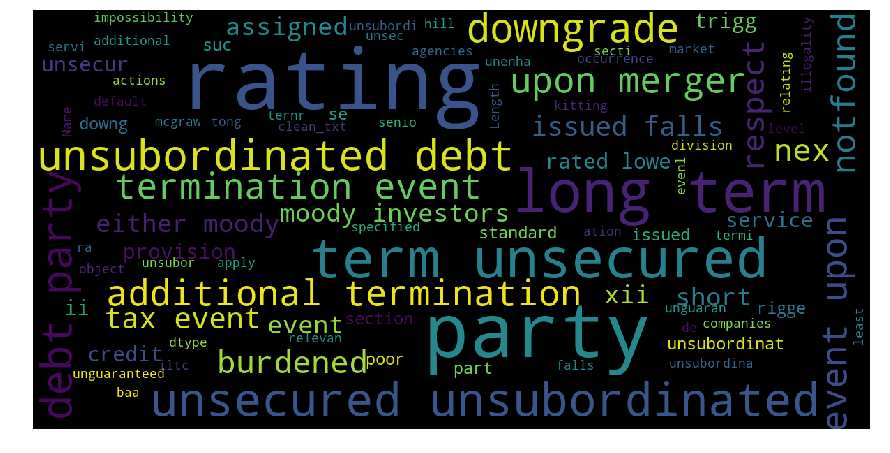

In [506]:

from wordcloud import WordCloud, STOPWORDS
stopwords1 = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='Black',
        stopwords=stopwords1,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(addev_df['clean_txt'])

In [507]:
addev_df.sample(10)

,txt,lab,or_count,and_count,clean_txt
85,NotFound,NotFound,0,0,notfound
37,\n\nThe “Credit Event Upon Merger” provisions ...,1,6,2,credit event upon merger provisions section b ...
45,\n\n(xii) Ratings Downgrade. The rating then a...,1,4,2,xii ratings downgrade rating assigned unguaran...
18,\n\nDowngrade of Party A. Either (x) Moody’s I...,1,21,9,downgrade party either x moody investors servi...
213,\n\nA ’’Credit Rating Downgrading1’ occurs wit...,1,6,3,credit rating downgrading occurs respect party...
204,\n\nThe rating issued by Standard & Poor’s Rat...,1,16,0,rating issued standard poor rating service suc...
89,"\n\nStandard and Poor’s Ratings Services, a di...",1,0,2,standard poor ratings services division mcgraw...
97,\n\n(A) any Rating in respect of Party A is is...,3,6,7,rating respect party issued falls rating trigg...
57,"\n\nIf the applicable party has long term, uns...",1,7,5,applicable party long term unsecured unsubordi...
88,"\n\nThe long-term unsecured, unsubordinated de...",1,6,2,long term unsecured unsubordinated debt party ...


In [508]:
feats=['or_count','and_count']

In [509]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
vec=TfidfVectorizer(ngram_range=(1,3))
xtvec=vec.fit_transform(addev_df['clean_txt'])


In [510]:
from scipy.sparse import csr_matrix
from scipy import sparse
final_features = sparse.hstack((addev_df[feats], xtvec)).tocsr()

In [511]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(final_features,addev_df['lab'],
                                                 test_size=0.25,random_state = 1994)

In [512]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,random_state=1994)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=1994, verbose=0,
            warm_start=False)

In [513]:
from sklearn.metrics import accuracy_score,f1_score
accuracy_score(y_val,rf.predict(X_val))

0.7777777777777778

In [514]:
# addevt
addevt_df=pd.DataFrame({'txt':addevt})

In [515]:
addevt_df['or_count']=addevt_df['txt'].apply(count_or)
addevt_df['and_count']=addevt_df['txt'].apply(count_and)
addevt_df.head()

,txt,or_count,and_count
0,"\n\nRatings: The long-term unsecured, unsubord...",2,2
1,"\n\nFor the avoidance of doubt, the term “Tax ...",5,1
2,\n\n(ii) Downgrade of Party A.\n\nEither (x) M...,11,3
3,NotFound,0,0
4,\n\nAdditional Termination Event\n\nThe long-t...,8,2


In [516]:
addevt_df['clean_txt']=addevt_df['txt'].apply(to_words)

In [517]:
xtvectst=vec.transform(addevt_df['clean_txt'])

In [518]:
from scipy.sparse import csr_matrix
from scipy import sparse
final_featurest = sparse.hstack((addevt_df[feats], xtvectst)).tocsr()

In [519]:
y=rd_df['RD_method_party_A']

In [520]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,random_state=1994)
rf.fit(final_features,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=1994, verbose=0,
            warm_start=False)

In [521]:
rd_m_pA=rf.predict(final_featurest)
rd_m_pA

array(['1', 'NotFound', '1', 'NotFound', '1', '1', '1', '1', '1',
       'NotFound', '1', '2', '1', '1', 'NotFound', '2', '3', '3', '1',
       'NotFound', 'NotFound', '1', '1', 'NotFound', 'NotFound', '3', '1',
       'NotFound', '3', 'NotFound', '1', '1', 'NotFound', '3', '1', '1',
       '1', '1', '1', '1', 'NotFound', '1', '1', '1', '3', '3', '3', '1',
       '1', '1', '1', 'NotFound', '1', '1', '1', '1', '1', '3', '1', '1',
       '1', '3', '1', 'NotFound', '1', 'NotFound', 'NotFound', '1', '1',
       '1', '1', '1', '1', '3', '1', '1', 'NotFound', '1', '1',
       'NotFound', '3', 'NotFound', '1', '3', '2', 'NotFound', '1', '1',
       'NotFound', 'NotFound', '1', '1', 'NotFound', 'NotFound',
       'NotFound', 'NotFound', 'NotFound', 'NotFound', 'NotFound',
       'NotFound', 'NotFound', '1', 'NotFound', 'NotFound', '2', '2',
       'NotFound', '1', '1', 'NotFound', '1', '1', '1', '1', '1',
       'NotFound', 'NotFound', 'NotFound', '3', '1', 'NotFound', '1', '2',
       '2', '1

In [522]:
addev_debt_class_df=pd.DataFrame({'txt':addev_df['txt'],'lab':rd_df['RD_party_A_short_term_debt_classification']})
addev_debt_class_df['lab'].value_counts()

NotFound                                 163
unsecured;unsubordinated                  42
Unsecured                                  9
senior unsecured;unsubordinated            9
unsecured                                  8
Financial Strength;Subordinated            8
senior Secured;unsubordinated              7
unsecured;unsubordinated;unguaranteed      2
Unsecured;Unguaranteed;Unsubordinated      1
Name: lab, dtype: int64

In [523]:
debt_cl=[]
for j in list(set(addev_debt_class_df['lab'].values)):
    debt_cl.extend(j.lower().split(';'))
debt_cll=list(set(debt_cl))

In [524]:
debt_cll

['unguaranteed',
 'subordinated',
 'senior unsecured',
 'notfound',
 'unsubordinated',
 'unsecured',
 'financial strength',
 'senior secured']

In [525]:

def clas_debt(v):
    ll=[]
    
    for l in debt_cll:
#         print('>>',len(v.lower()[v.lower().find(l):v.lower().find(l)+len(l)]),'>',len(l))
        if v.lower().find(l)!=-1 and v.lower()[v.lower().find(l)-1]==" " and v.find('short-term')!=-1:
            ll.append(l)
#         print(re.search('\\b'+l+'\\b', v.lower()))
    return ";".join(ll)

In [526]:
addev_debt_class_df['txt'].apply(clas_debt)

0                                                       
1                                              unsecured
2              senior unsecured;unsubordinated;unsecured
3                                              unsecured
4                                                       
5                               unsubordinated;unsecured
6                                                       
7                                                       
8                                                       
9                                                       
10                                                      
11                                                      
12                                             unsecured
13                                                      
14                                                      
15             senior unsecured;unsubordinated;unsecured
16                                                      
17                             

In [527]:
addev_debt_class_df['txt'].values[1]

'\n\n(h) "Additional Termination Event" provision of Section 5(b) will apply as follows:\n\n- First Additional Termination Event:\n\nParty B’s NAV has fallen by more than 25 % in any rolling quaterly period or by more than 35\n% in any twelve months period.\n\nDowngrade of Party A. Either (x) Moody\'s Investors Service, Inc.fMoody\'s") or Standard &\nPoor\'s Ratings Group, a division of The McGraw-Hill Companies, Inc. ("SnP") reduces Party A\'s\n(1) short-term unsecured debt rating below P-2 by Moody\'s or Al by S&P or (2) long-term\nunsecured debt rating below Al by Moody\'s or AA- by S&P, or any such rating is suspended or\nwithdrawn by either S&P or Moody\'s, or (y) (i) the short-term unsecured debt rating by Moody\'s\nis P-l and Moody\'s places Party A on credit watch with negative implications or (ii) the long-term\nunsecured debt rating by Moody\'s is A2 and Moody\'s places Party A on credit watch with\nnegative implications and, in any such case, within 30 days of such downgrade

In [528]:
addev_debt_class_df.tail()

,txt,lab
244,\n\n(a) Rating Agencies Actions Relating to Pa...,NotFound
245,\n\nTax Event Upon Merger. The party (the “Bur...,NotFound
246,\n\nTax Event Upon Merger. The party (the “Bur...,NotFound
247,NotFound,NotFound
248,NotFound,NotFound


In [529]:
addev_debt_class_test_df=pd.DataFrame({'txt':addevt_df['txt']})
addev_debt_class_test_df.head()

,txt
0,"\n\nRatings: The long-term unsecured, unsubord..."
1,"\n\nFor the avoidance of doubt, the term “Tax ..."
2,\n\n(ii) Downgrade of Party A.\n\nEither (x) M...
3,NotFound
4,\n\nAdditional Termination Event\n\nThe long-t...


In [530]:
addev_debt_class_test_df['test_lb']=addev_debt_class_test_df['txt'].apply(clas_debt).replace('',np.nan).fillna('NotFound').values

In [531]:
addev_debt_class_test_df.shape

(140, 2)

In [532]:
addev_mdy_trig_df=pd.DataFrame({'txt':addev_df['txt'],'lab':rd_df['RD_party_A_moody_short_term_trigger_method']})
addev_mdy_trig_df['lab'].value_counts()

NotFound    163
below        86
Name: lab, dtype: int64

In [533]:
rd_df['RD_party_A_moody_short_term_trigger_method'].value_counts()

NotFound    163
below        86
Name: RD_party_A_moody_short_term_trigger_method, dtype: int64

In [534]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(addev_mdy_trig_df['txt'],addev_mdy_trig_df['lab'],
                                                 test_size=0.25,random_state = 1994)

In [535]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer(ngram_range=(1,4))
xtvec=vec.fit_transform(X_train)
xtstvec=vec.transform(X_val)

In [536]:
# vec.vocabulary_

In [537]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,random_state=1994)
rf.fit(xtvec,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=1994, verbose=0,
            warm_start=False)

In [538]:
sorted(zip(rf.feature_importances_,vec.vocabulary_),reverse=True)

[(0.011294356541992871, 'of becoming legally'),
 (0.010727720176026235, 'at times be'),
 (0.009723071901674374, 'rating below al'),
 (0.009232297777017, 'service inc fmoody'),
 (0.00896502916368043, 'party is the'),
 (0.008537253229219806, 'that and or'),
 (0.007750844767334565, 'event or tv'),
 (0.007705893825901467, 'for these purposes previously'),
 (0.006863154974729632, 'support provider in making'),
 (0.006636597392823205, 'rating agency and not'),
 (0.006458206863821819, 'obligations prior to'),
 (0.006372738224338592, 'fmoody or standard'),
 (0.0060964673911079225, 'or 34 ii'),
 (0.006078982012560258, 'into escrow the party'),
 (0.00594432235804635, 'is delivered by party'),
 (0.00575181325387908, 'below al by'),
 (0.005747601277382719, 'off time provided further'),
 (0.00550985713655259, 'to party party may'),
 (0.00547213479240682, 'whether entered into'),
 (0.005073374209776238, 'of security under'),
 (0.005056746582521425, 'event or 34'),
 (0.00499818752571977, 'remains cap

In [539]:
from sklearn.metrics import accuracy_score,f1_score
accuracy_score(y_val,rf.predict(xtstvec))

0.9841269841269841

In [540]:
addev_mdy_trig_t_df=pd.DataFrame({'txt':addevt_df['txt']})
addev_mdy_trig_t_df.head()

,txt
0,"\n\nRatings: The long-term unsecured, unsubord..."
1,"\n\nFor the avoidance of doubt, the term “Tax ..."
2,\n\n(ii) Downgrade of Party A.\n\nEither (x) M...
3,NotFound
4,\n\nAdditional Termination Event\n\nThe long-t...


In [541]:
vec=TfidfVectorizer(ngram_range=(1,4))
xtvec=vec.fit_transform(addev_mdy_trig_df['txt'])
xtstvec=vec.transform(addev_mdy_trig_t_df['txt'])
y=addev_mdy_trig_df['lab']

In [542]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,random_state=1994)
rf.fit(xtvec,y)
addev_mdy_trig_t=rf.predict(xtstvec)
addev_mdy_trig_t

array(['below', 'NotFound', 'below', 'NotFound', 'below', 'below',
       'NotFound', 'NotFound', 'below', 'NotFound', 'below', 'below',
       'NotFound', 'below', 'NotFound', 'NotFound', 'below', 'NotFound',
       'NotFound', 'NotFound', 'NotFound', 'NotFound', 'NotFound',
       'NotFound', 'NotFound', 'NotFound', 'below', 'NotFound',
       'NotFound', 'NotFound', 'below', 'below', 'NotFound', 'NotFound',
       'below', 'below', 'NotFound', 'NotFound', 'below', 'NotFound',
       'NotFound', 'NotFound', 'NotFound', 'NotFound', 'below',
       'NotFound', 'NotFound', 'NotFound', 'below', 'NotFound', 'below',
       'NotFound', 'below', 'NotFound', 'NotFound', 'NotFound',
       'NotFound', 'NotFound', 'NotFound', 'NotFound', 'NotFound',
       'NotFound', 'NotFound', 'NotFound', 'below', 'NotFound',
       'NotFound', 'NotFound', 'NotFound', 'below', 'below', 'NotFound',
       'NotFound', 'below', 'below', 'NotFound', 'NotFound', 'NotFound',
       'NotFound', 'NotFound', 'NotFou

In [543]:
rd_feat=['RD_party_A_moody_short_term_threshold',
       'RD_party_A_SnP_short_term_trigger_method',
       'RD_party_A_SnP_short_term_threshold',
       'RD_party_A_Fitch_short_term_trigger_method',
       'RD_party_A_Fitch_short_term_threshold',
#        'RD_party_A_long_term_debt_classification',
       'RD_party_A_moody_long_term_trigger_method',
       'RD_party_A_moody_long_term_threshold',
       'RD_party_A_SnP_long_term_trigger_method',
       'RD_party_A_SnP_long_term_threshold',
       'RD_party_A_Fitch_long_term_trigger_method',
       'RD_party_A_Fitch_long_term_threshold']

In [544]:
addev_df.head()

,txt,lab,or_count,and_count,clean_txt
0,\n\n(a) The rating issued by Standard & Poor’s...,1,11,5,rating issued standard poor rating service suc...
1,"\n\n(h) ""Additional Termination Event"" provisi...",1,11,3,h additional termination event provision secti...
2,"\n\n""Event of Default, Illegality and Impossib...",1,9,3,event default illegality impossibility event c...
3,\n\nParty A.\n\nDowngrade of Party A.\n\nEithe...,1,10,2,party downgrade party either x moody investors...
4,\n\nKitting* Event The rating then assigned to...,1,3,2,kitting event rating assigned tong ternr senio...


In [545]:
#####################
#doing it once
#do it once RD_party_A_long_term_debt_classification
#RD_party_A_moody_long_term_trigger_method      RD_party_A_SnP_long_term_trigger_method
##all classification
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
rd_df['RD_party_A_moody_long_term_trigger_method']=rd_df['RD_party_A_moody_long_term_trigger_method'].apply(lambda x:x.lower())
rd_df['RD_party_A_SnP_long_term_trigger_method']=rd_df['RD_party_A_SnP_long_term_trigger_method'].apply(lambda x:x.lower())
d={}
for ft in rd_feat:
    print('--------',ft,'----------')
#     print(rd_df[ft].value_counts())
    temp_df=pd.DataFrame({'txt':addev_df['clean_txt'],'label':rd_df[ft]})
    
    X_train,X_val,y_train,y_val = train_test_split(temp_df['txt'],temp_df['label'],
                                                 test_size=0.25,random_state = 1994)
    print('TF-ID')
    vec=TfidfVectorizer(ngram_range=(1,3))
    xtvec=vec.fit_transform(X_train)
    xtstvec=vec.transform(X_val)
    print('For Train Data Validation Acc RF--------------')
    rf=RandomForestClassifier(n_estimators=200,random_state=1994)
    rf.fit(xtvec,y_train)
    print('Accuracy for >',ft,accuracy_score(y_val,rf.predict(xtstvec)))
    print('For Test Data--------------')
    temp_test_df=pd.DataFrame({'txt':addevt_df['clean_txt']})
    vec=TfidfVectorizer(ngram_range=(1,4))
    xtvec=vec.fit_transform(temp_df['txt'])
    xtstvec=vec.transform(temp_test_df['txt'])
    y=temp_df['label']
    rf=RandomForestClassifier(n_estimators=200)
    rf.fit(xtvec,y)
    print('Predicting...')
    temp_label=rf.predict(xtstvec)
    d[ft]=temp_label

-------- RD_party_A_moody_short_term_threshold ----------
TF-ID
For Train Data Validation Acc RF--------------
Accuracy for > RD_party_A_moody_short_term_threshold 0.9682539682539683
For Test Data--------------
Predicting...
-------- RD_party_A_SnP_short_term_trigger_method ----------
TF-ID
For Train Data Validation Acc RF--------------
Accuracy for > RD_party_A_SnP_short_term_trigger_method 0.9682539682539683
For Test Data--------------
Predicting...
-------- RD_party_A_SnP_short_term_threshold ----------
TF-ID
For Train Data Validation Acc RF--------------
Accuracy for > RD_party_A_SnP_short_term_threshold 0.9365079365079365
For Test Data--------------
Predicting...
-------- RD_party_A_Fitch_short_term_trigger_method ----------
TF-ID
For Train Data Validation Acc RF--------------
Accuracy for > RD_party_A_Fitch_short_term_trigger_method 0.9682539682539683
For Test Data--------------
Predicting...
-------- RD_party_A_Fitch_short_term_threshold ----------
TF-ID
For Train Data Validatio

In [546]:
len(d.keys())

11

In [547]:
rd_df['RD_party_A_moody_short_term_threshold'].value_counts()

NotFound    163
P-1          76
A2            8
P-2           2
Name: RD_party_A_moody_short_term_threshold, dtype: int64

In [548]:
rd_df['RD_party_A_long_term_debt_classification'].value_counts()


NotFound                            91
unsecured;Unsubordinated            59
Unsecured;Unsubordinated            24
Senior Unsecured                    22
Unsecured                           10
senior secured;subordinated          8
unsecured                            8
senior unsecured;unsubordinated      7
senior unsecured;Unsubordinated      6
unsecured;unsubordinated             3
Unsecured;UnSubordinated             3
Unsecured;Senior                     1
Unsecured;unsubordinated             1
senior unsecured                     1
Senior                               1
Senior unsecured                     1
Senior Unsecured;Unsubordinated      1
Usecured;Unsubordinated              1
Unsecured;Subordinated               1
Name: RD_party_A_long_term_debt_classification, dtype: int64

In [549]:
debt_cl_lng=[]
for j in list(set(rd_df['RD_party_A_long_term_debt_classification'].values)):
    debt_cl_lng.extend(j.lower().split(';'))
debt_cl_lng=list(set(debt_cl_lng))
debt_cl_lng

['unsubordinated ',
 'senior unsecured',
 'subordinated',
 'usecured',
 'notfound',
 'unsubordinated',
 'unsecured',
 'senior',
 'senior secured']

In [550]:

def clas_debt_lng(v):
    ll=[]
    
    for l in debt_cll:
#         print('>>',len(v.lower()[v.lower().find(l):v.lower().find(l)+len(l)]),'>',len(l))
        if v.lower().find(l)!=-1 and v.lower()[v.lower().find(l)-1]==" " and v.find('long-term')!=-1:
            ll.append(l)
#         print(re.search('\\b'+l+'\\b', v.lower()))
    return ";".join(ll)

addevt_df['RD_party_A_long_term_debt_classification']=addevt_df['txt'].apply(clas_debt_lng).replace('',np.nan).fillna('NotFound')

In [551]:
d['RD_party_A_long_term_debt_classification']=addevt_df['RD_party_A_long_term_debt_classification']

In [552]:
RD=pd.DataFrame({'RD_method_party_A':rd_m_pA,
                 'RD_party_A_short_term_debt_classification':addev_debt_class_test_df['test_lb'],
                'RD_party_A_moody_short_term_trigger_method':addev_mdy_trig_t})




In [553]:
for ffft in d.keys():
    RD[ffft]=d[ffft]
RD.head()

,RD_method_party_A,RD_party_A_short_term_debt_classification,RD_party_A_moody_short_term_trigger_method,RD_party_A_moody_short_term_threshold,RD_party_A_SnP_short_term_trigger_method,RD_party_A_SnP_short_term_threshold,RD_party_A_Fitch_short_term_trigger_method,RD_party_A_Fitch_short_term_threshold,RD_party_A_moody_long_term_trigger_method,RD_party_A_moody_long_term_threshold,RD_party_A_SnP_long_term_trigger_method,RD_party_A_SnP_long_term_threshold,RD_party_A_Fitch_long_term_trigger_method,RD_party_A_Fitch_long_term_threshold,RD_party_A_long_term_debt_classification
0,1,NotFound,below,NotFound,NotFound,NotFound,NotFound,NotFound,below,Baa3,below,BBB,below,BBB+,unsubordinated;unsecured
1,NotFound,NotFound,NotFound,NotFound,NotFound,NotFound,NotFound,NotFound,notfound,NotFound,notfound,NotFound,NotFound,NotFound,NotFound
2,1,unsecured,below,P-1,below,A1,NotFound,NotFound,below,A2,below,AA-,NotFound,NotFound,unsecured
3,NotFound,NotFound,NotFound,NotFound,NotFound,NotFound,NotFound,NotFound,notfound,NotFound,notfound,NotFound,NotFound,NotFound,NotFound
4,1,senior unsecured;unsubordinated;unsecured,below,P-1,below,A-1+,below,F1,below,Baa3,below,BBB,below,BBB-,senior unsecured;unsubordinated;unsecured


In [554]:
RD.to_csv('RD.csv',index=False)